<a href="https://colab.research.google.com/github/gursewak96/Fashion-MNIST-Classification-using-PyTorch/blob/main/ANN_Fashion_MNIST_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification using PyTorch 👗👟👜

## Introduction

This project aims to classify images of clothing items from the Fashion MNIST dataset using a PyTorch-based deep learning model. 🧠 Fashion MNIST is a dataset of 70,000 grayscale images of clothing and accessories, each belonging to one of 10 categories. 👕👖 It serves as a drop-in replacement for the classic MNIST dataset, offering a more challenging classification task while maintaining a manageable size for experimentation. 🧪

The project will involve the following steps:

1. **Data Loading and Preprocessing:** Loading the Fashion MNIST dataset and preprocessing the images to prepare them for model training. 📥
2. **Model Building:** Designing and implementing a deep learning model using PyTorch, likely employing convolutional neural networks (CNNs) for image feature extraction. 🧱
3. **Model Training:** Training the model on the Fashion MNIST training dataset, optimizing its parameters to minimize classification errors. 🏋️‍♀️
4. **Model Evaluation:** Evaluating the trained model's performance on the Fashion MNIST test dataset, assessing its accuracy and generalization capabilities. 📊
5. **Visualization and Interpretation:** Visualizing the model's predictions and potentially exploring techniques for interpreting its learned features. 📈

In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
# set manual seed for reproducibility
torch.manual_seed(42)

In [3]:
# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## Dataloading and Preprocessing

 Loading the Fashion MNIST dataset and preprocessing the images to prepare them for model training.

In [4]:
train_dataset_filepath = "/content/fashion-mnist_train.csv"

In [5]:
df_train = pd.read_csv(train_dataset_filepath)
df_train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.shape

(60000, 785)

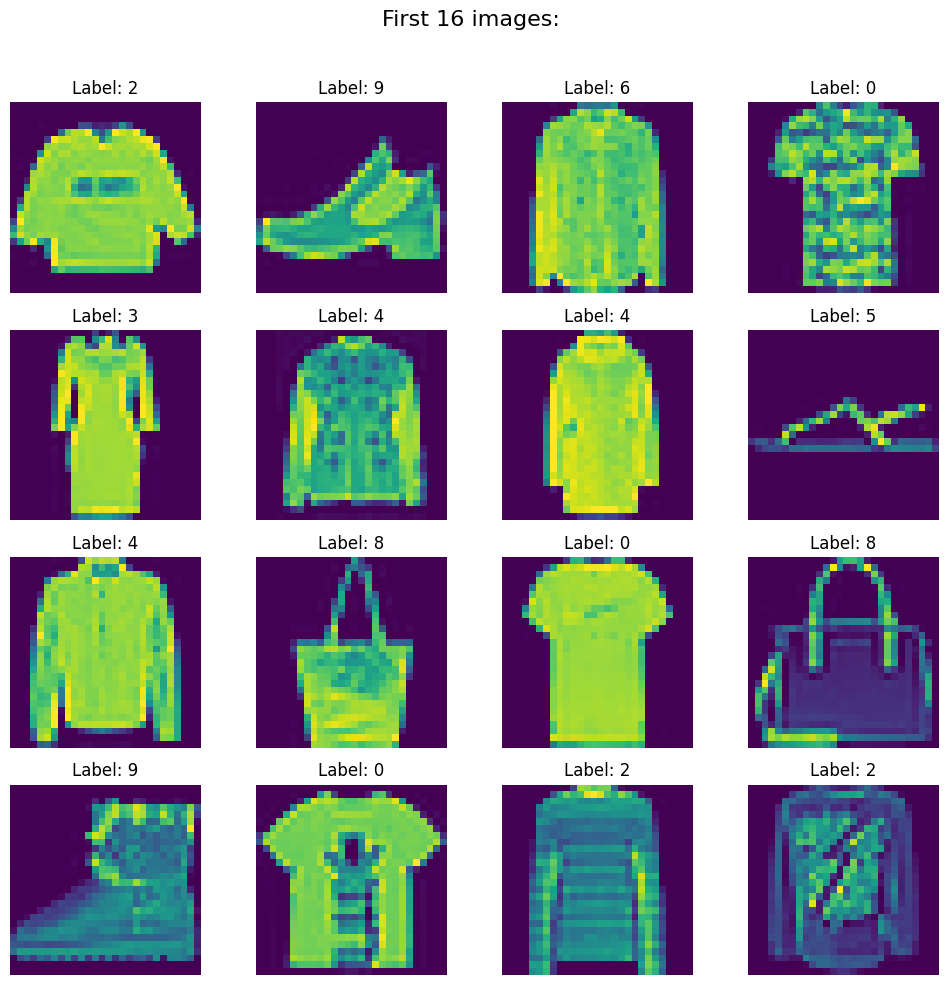

In [7]:
# visualizing images
fig, axs = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 images: ",fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axs.flat):
    img = df_train.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Label: {df_train.iloc[i, 0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


In [8]:
# Train Test Split
X = df_train.iloc[:,1:].values
y = df_train.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Scaling the features
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
# Creating Custom Dataset class
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]


In [11]:
# create train dataset object
train_dataset = CustomDataset(X_train, y_train)
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2275,
         0.5333, 0.0000, 0.0

In [12]:
# Create test dataset object
test_dataset = CustomDataset(X_test, y_test)
test_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [13]:
# Create train and test dataloader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## Model Building

Designing and implementing a deep learning model using PyTorch, likely employing convolutional neural networks (CNNs) for image feature extraction.

In [19]:
# define NN class
class FashionMnistNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64, 10)
    )

  def forward(self, X):
    return self.model(X)

## Model Training

Training the model on the Fashion MNIST training dataset, optimizing its parameters to minimize classification errors.

In [20]:
#set learning rate and epochs
epochs = 100
learning_rate = 0.1

In [21]:
# Instantiate the model
model = FashionMnistNN(num_features=X_train.shape[1])

#move the model to gpu
model.to(device)

# set the loss function
criterion = nn.CrossEntropyLoss()

# set the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)


In [22]:
len(train_dataloader)

1500

In [23]:
# training loop
for epoch in range(epochs):

  total_epoch_loss = 0
  for batch_features, batch_labels in train_dataloader:

    # move the data to gpu
    batch_features, batch_labels  = batch_features.to(device), batch_labels.to(device)

    # forward pass
    y_pred = model(batch_features)

    # calculate loss
    loss = criterion(y_pred, batch_labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()

    # update gradients
    optimizer.step()

    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss/len(train_dataloader)
  print("Epoch: {} Loss: {}".format(epoch + 1, avg_loss))

Epoch: 1 Loss: 0.6253465111156304
Epoch: 2 Loss: 0.4947437292734782
Epoch: 3 Loss: 0.4568548173705737
Epoch: 4 Loss: 0.4339612967967987
Epoch: 5 Loss: 0.41624679138263065
Epoch: 6 Loss: 0.405450891589125
Epoch: 7 Loss: 0.3935239982207616
Epoch: 8 Loss: 0.38070508908480405
Epoch: 9 Loss: 0.3756632667183876
Epoch: 10 Loss: 0.3714536840567986
Epoch: 11 Loss: 0.3683771576732397
Epoch: 12 Loss: 0.3581636916399002
Epoch: 13 Loss: 0.35298422508438426
Epoch: 14 Loss: 0.35146956216792263
Epoch: 15 Loss: 0.3453809697180986
Epoch: 16 Loss: 0.34098062543570995
Epoch: 17 Loss: 0.3363540516297023
Epoch: 18 Loss: 0.33401149639487265
Epoch: 19 Loss: 0.3296705158700546
Epoch: 20 Loss: 0.32773709592719874
Epoch: 21 Loss: 0.32654390795528887
Epoch: 22 Loss: 0.32572177121291557
Epoch: 23 Loss: 0.32279433220873277
Epoch: 24 Loss: 0.3209902078062296
Epoch: 25 Loss: 0.31482130246361095
Epoch: 26 Loss: 0.316433444082737
Epoch: 27 Loss: 0.3102566524321834
Epoch: 28 Loss: 0.3099829400529464
Epoch: 29 Loss: 0.30

## Model Evaluation

 Evaluating the trained model's performance on the Fashion MNIST test dataset, assessing its accuracy and generalization capabilities.

In [24]:
# set the model to eval mode
model.eval()

FashionMnistNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [25]:
# evaluatin code On Test data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_dataloader:
    # move the data to gpu
    batch_features, batch_labels  = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)

    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

print("Test Accuracy: {}%".format(100*correct/total))


Test Accuracy: 89.08333333333333%


In [26]:
# evaluatin code On Train data
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_dataloader:
    # move the data to gpu
    batch_features, batch_labels  = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)
    _, predicted = torch.max(outputs, 1)

    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

print("Training Accuracy: {}%".format(100*correct/total))


Training Accuracy: 94.22083333333333%
